<a href="https://colab.research.google.com/github/vitorfrois/PageRank/blob/main/PageRank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx

The PageRank algorithm is one way of ranking the nodes in a graph by importance.

Consider a tiny network. Nodes are pages and arcs are hyperlinks. 

If users start on random pages and randomly click in hyperlinks, after a certain amount of time, what page would be the most visited one?

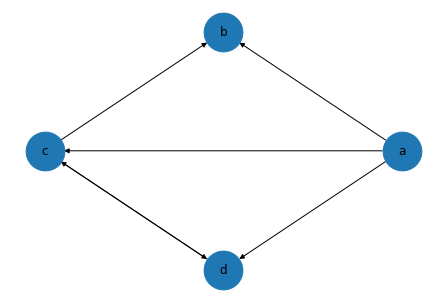

In [ ]:
G = nx.DiGraph()
G.add_nodes_from(['a','b','c','d'])
G.add_edges_from([('a','b'),('a','c'),('a','d'),('c','b'),('c','d'),('d','c')])
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1500, label="Tiny-Web")

It is possible to express this graph as an adjacency matrix, which is easier to analyze.

In [ ]:
AdjM = nx.to_numpy_array(G).T
AdjM

array([[0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.]])

As the above graph shows, node B has no outgoing link. This would cause the surfer to stop. 


We can add virtual links from B to each node in the graph (random jumps) to prevent this.

In [ ]:
AdjM.T[1] += 1
AdjM

array([[0., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.]])

The damping factor, represented by ϵ $[0,1]$ is the probability that a user follows one link and $1-ϵ$ that he do a random jump.

In [ ]:
damp  = 0.85

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Now we must represent a probability matrix. All the links have equal weights, so the probability of going to each neighbor of some node is $\frac{1}{N}$ where $N$ is the number of neighbors.

In [ ]:
probM = np.zeros_like(AdjM)
for i in range(0, len(probM[0])):
  sum = np.sum(AdjM.T[i])
  probM.T[i] = AdjM.T[i] * (1/sum)
probM

array([[0.        , 0.25      , 0.        , 0.        ],
       [0.33333333, 0.25      , 0.5       , 0.        ],
       [0.33333333, 0.25      , 0.        , 1.        ],
       [0.33333333, 0.25      , 0.5       , 0.        ]])

We also must have a ones matrix, that represents random jumps probability.

In [ ]:
ones = np.ones_like(probM)
ones /= len(probM[0])
ones

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [ ]:
_A = damp*probM + (1-damp) * ones
_A

array([[0.0375    , 0.25      , 0.0375    , 0.0375    ],
       [0.32083333, 0.25      , 0.4625    , 0.0375    ],
       [0.32083333, 0.25      , 0.0375    , 0.8875    ],
       [0.32083333, 0.25      , 0.4625    , 0.0375    ]])

Now, the $x$ PageRank is the eigenvector of _A corresponding to the eigenvalue $λ = 1$

In [ ]:
eig, prresult = np.linalg.eig(_A)
x = prresult.T[0]
x

array([0.17900289, 0.51248774, 0.66533496, 0.51248774])

Now we just have to normalize the values, so the sum of them all $= 1$.

In [ ]:
x /= np.sum(x)
x

array([0.09575864, 0.27415829, 0.35592479, 0.27415829])

With the PageRank vector in mind, we can assume based on Graph \G that the importance order is $c>b=d>a$.

When checking with NetworkX library, we see our results are correct.

In [ ]:
nx.pagerank(G)

{'a': 0.09575851632006248,
 'b': 0.2741586154363689,
 'c': 0.3559242528071995,
 'd': 0.2741586154363689}

array([0.17900289, 0.51248774, 0.66533496, 0.51248774])